# FDA

---

## Function-on-scalar regression model

**Question of interest :** What is the association between treatment assignment and activity pattern?

We can use a functiuon-on-scalar regression model to answer this question:  
$$Act_i(t) = \beta_0(t) + \beta_1(t)Treatment_i  +\epsilon_i(t)$$

## Load input: packages, external functions, input data.

### Packages

In [35]:
# Libraries
library(fda)
library(fdANOVA)
library(tidyverse)
library(refund)
library(refund.shiny)
#theme_set(theme_bw() + theme(legend.position = "bottom"))
library(ggplot2)
library(fields)
library(mgcv)

### Data

In [80]:
# Read cvs file
# df = read_csv("../../../data/fda/mBaselineSteps60.csv");
# df = read_csv("../../../data/fda/mVisitBaseline_60_Acc.csv");
# df = read_csv("../../../data/fda/mVisit32w_60_Acc.csv");
# df = read_csv("../../../data/fda/mVisit6wPP_60_Acc.csv");
df = read_csv("../../../data/fda/mVisit6mPP_60_Acc.csv");
# df = read_csv("../../../data/fda/mVisit12mPP_60_Acc.csv")
# df = read_csv("../../../data/fda/mVisit32w-VisitBaseline_60_Acc.csv");



names(df)[names(df)=="studyID"] <- "id"
df$id <- as.character(df$id)
head(df, 5)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double()
)
i Use `spec()` for the full column specifications.




id,arm,T00h00,T01h00,T02h00,T03h00,T04h00,T05h00,T06h00,T07h00,...,T14h00,T15h00,T16h00,T17h00,T18h00,T19h00,T20h00,T21h00,T22h00,T23h00
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,1,8015.1429,7270.143,5570.0000,6344.7143,9615.2857,7870.000,24050.286,29771.143,...,17926.714,17574.00,23023.29,21702.14,29169.71,34612.429,27223.571,30893.143,22504.429,11011.8571
43,2,2613.0000,2536.571,1332.0000,621.5714,949.2857,5706.000,35889.000,19251.000,...,29231.286,35879.71,61362.71,18029.71,21129.00,8243.143,5242.429,3743.857,2640.286,1306.8571
44,3,5258.7143,4980.286,569.1429,405.4286,851.1429,1239.714,1804.286,7257.286,...,23493.429,21882.14,24557.86,19674.43,24608.14,23671.286,15211.429,21052.000,18896.429,17172.2857
47,2,4356.8333,4399.667,2820.3333,7352.1667,3483.6667,46852.167,29749.000,25124.333,...,40468.500,31729.00,32260.67,24546.83,32361.50,39356.833,19846.833,22946.167,8861.000,4566.1667
53,3,340.2857,316.000,449.2857,305.4286,1365.4286,15606.857,12937.429,9445.429,...,8829.857,12714.43,10986.00,13996.71,17523.14,12779.143,11810.143,9751.000,4778.857,205.7143


In [4]:
filter(df, id == "248" )

id,arm,T00h00,T01h00,T02h00,T03h00,T04h00,T05h00,T06h00,T07h00,...,T14h00,T15h00,T16h00,T17h00,T18h00,T19h00,T20h00,T21h00,T22h00,T23h00
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
248,1,562.1667,750.8333,468.5,489,337.8333,266.1667,9891.833,23382.5,...,10722.83,8054.167,12134.17,35415.33,26920,13625.33,12860.83,8031.333,5385.167,7861


### Define response and predictor:

In [81]:
# Create temporal axis depending on the resolution of the data
time <- 1:(dim(df)[2]-2)

Y <- as.matrix(df[,c(3:dim(df)[2])]) # response: physical activity
X <- as.vector(df$arm) # predictor: treatment assignment

myDat <- data.frame(X = X)
myDat$Y <- Y

dim(Y);length(X)

[1] 139  24

[1] 139

### Fit function-on-scalar regression model using the pffr function.
(The pffr function in the refund package can fit any functional linear model with functional response.)

In [82]:
fit <- pffr(Y ~ X, data = myDat) # fit
yhat <- predict(fit, newdata = myDat) # get prediction according to the model

**Calculate $R^2$**   
$$R^2 = 1 - \frac{\sum_i{(y_i - \hat{y}_i)^2}}{\sum_i{(y_i - \overline{y}_i)^2}}$$

In [83]:
Rsq_t <- 1-colSums((Y - yhat)^2) / colSums((Y - colMeans(Y))^2)
mean(Rsq_t)

[1] 0.6236132

In [84]:
# set plot size
options(repr.plot.width=15, repr.plot.height=10)

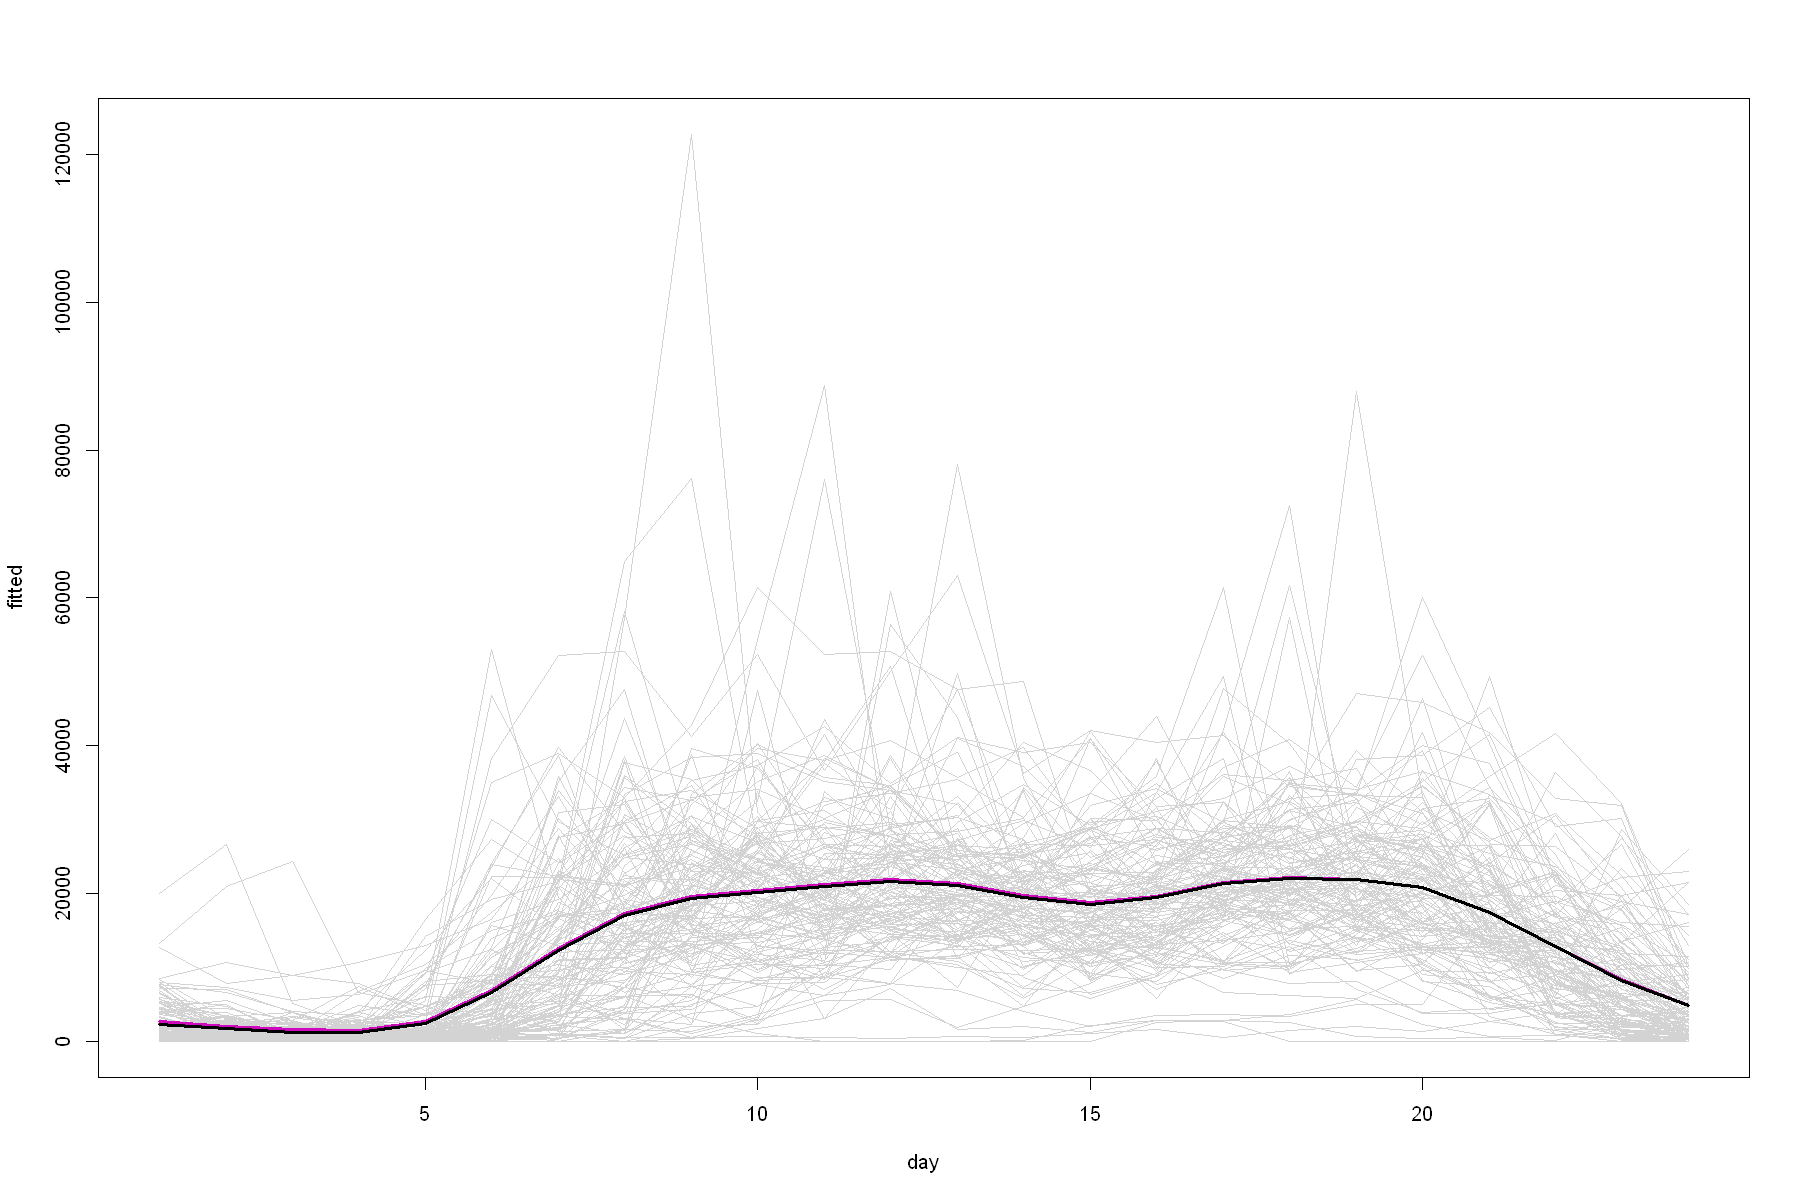

In [85]:
matplot(time, t(Y), type='l', lty = 1, 
        col='light grey', ylab="fitted", xlab="day")
matlines(time, t(yhat), type='l', lty = 1, lwd = 3)

In [86]:
 rownames(Y) <- df$id

accel_df = as_refundObj(Y)
# value is the value of the activity count
# index is the percentage period over 24 hours

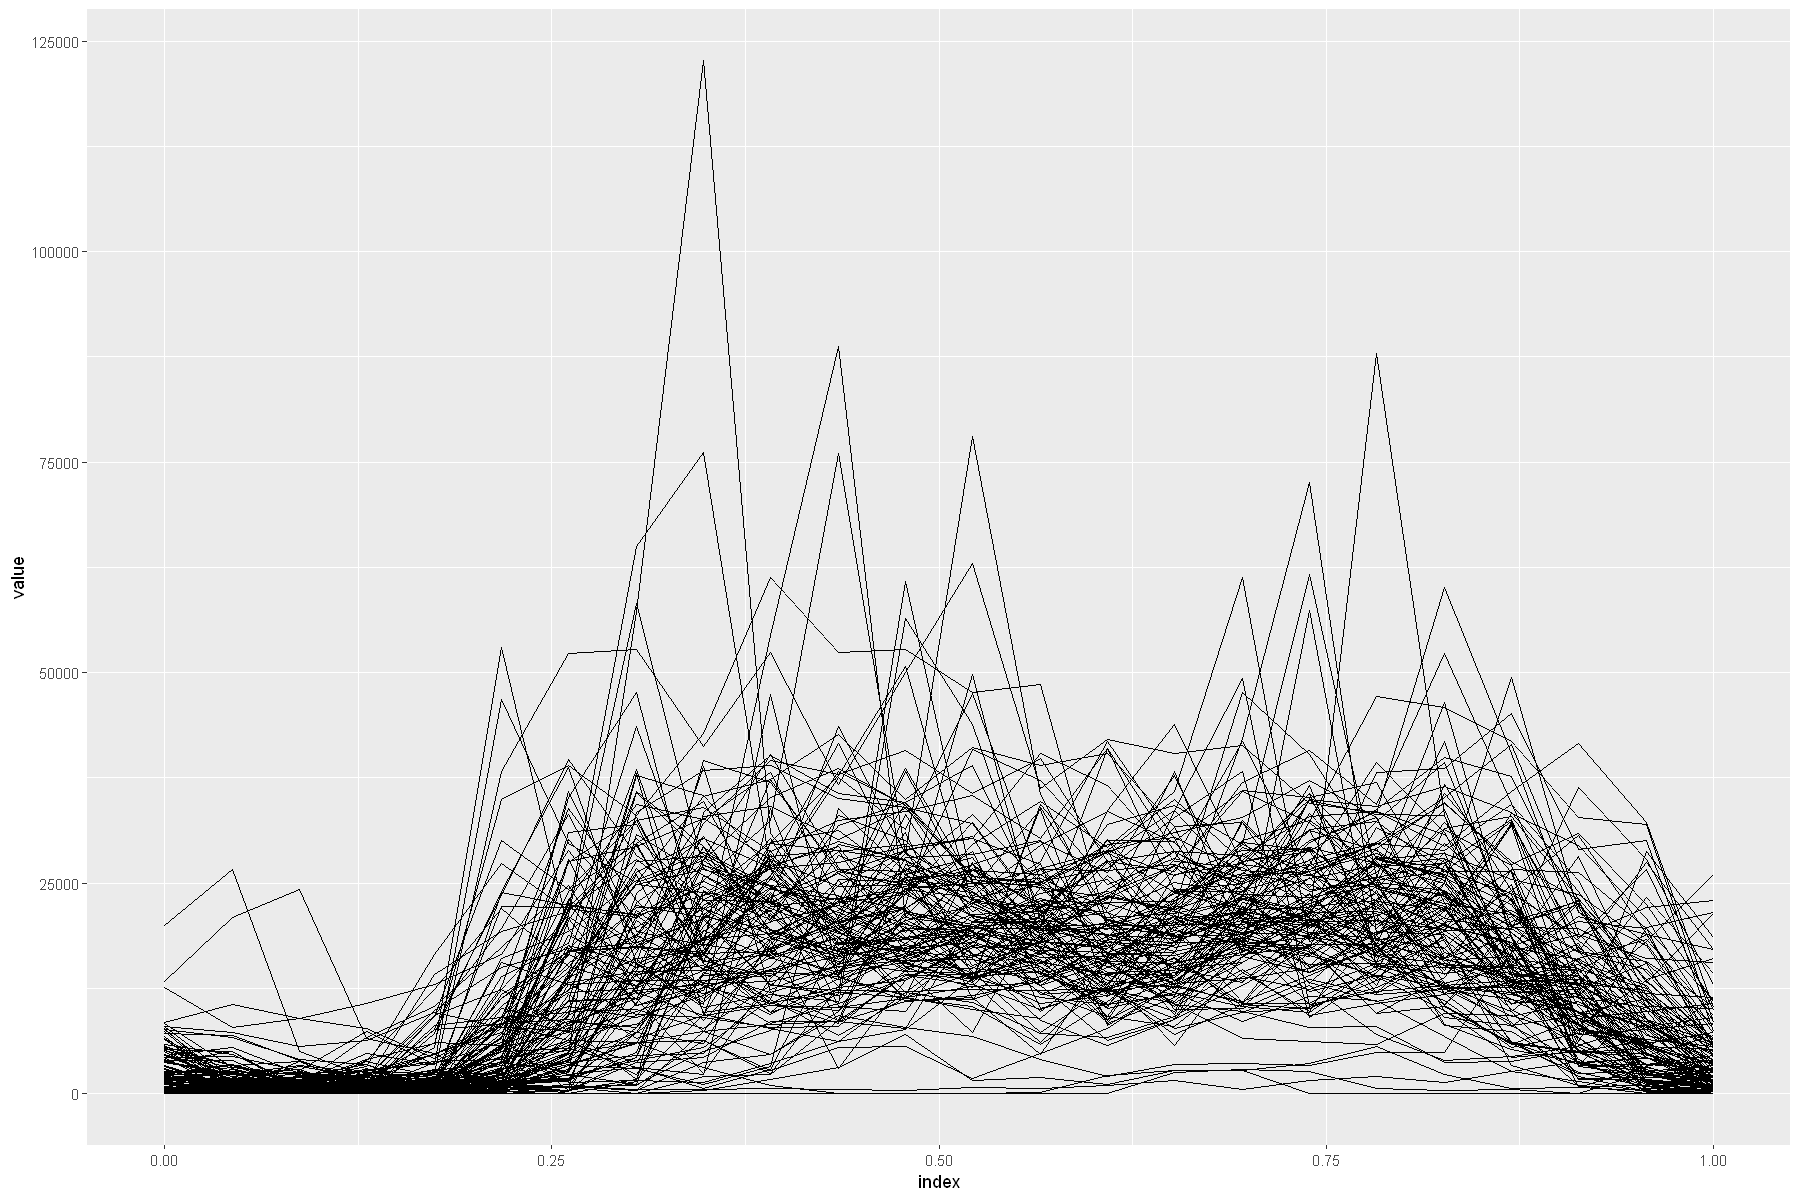

In [87]:
ggplot(accel_df, aes(x = index, y = value, group = id)) + geom_line()

### Plot by group

Joining, by = "id"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



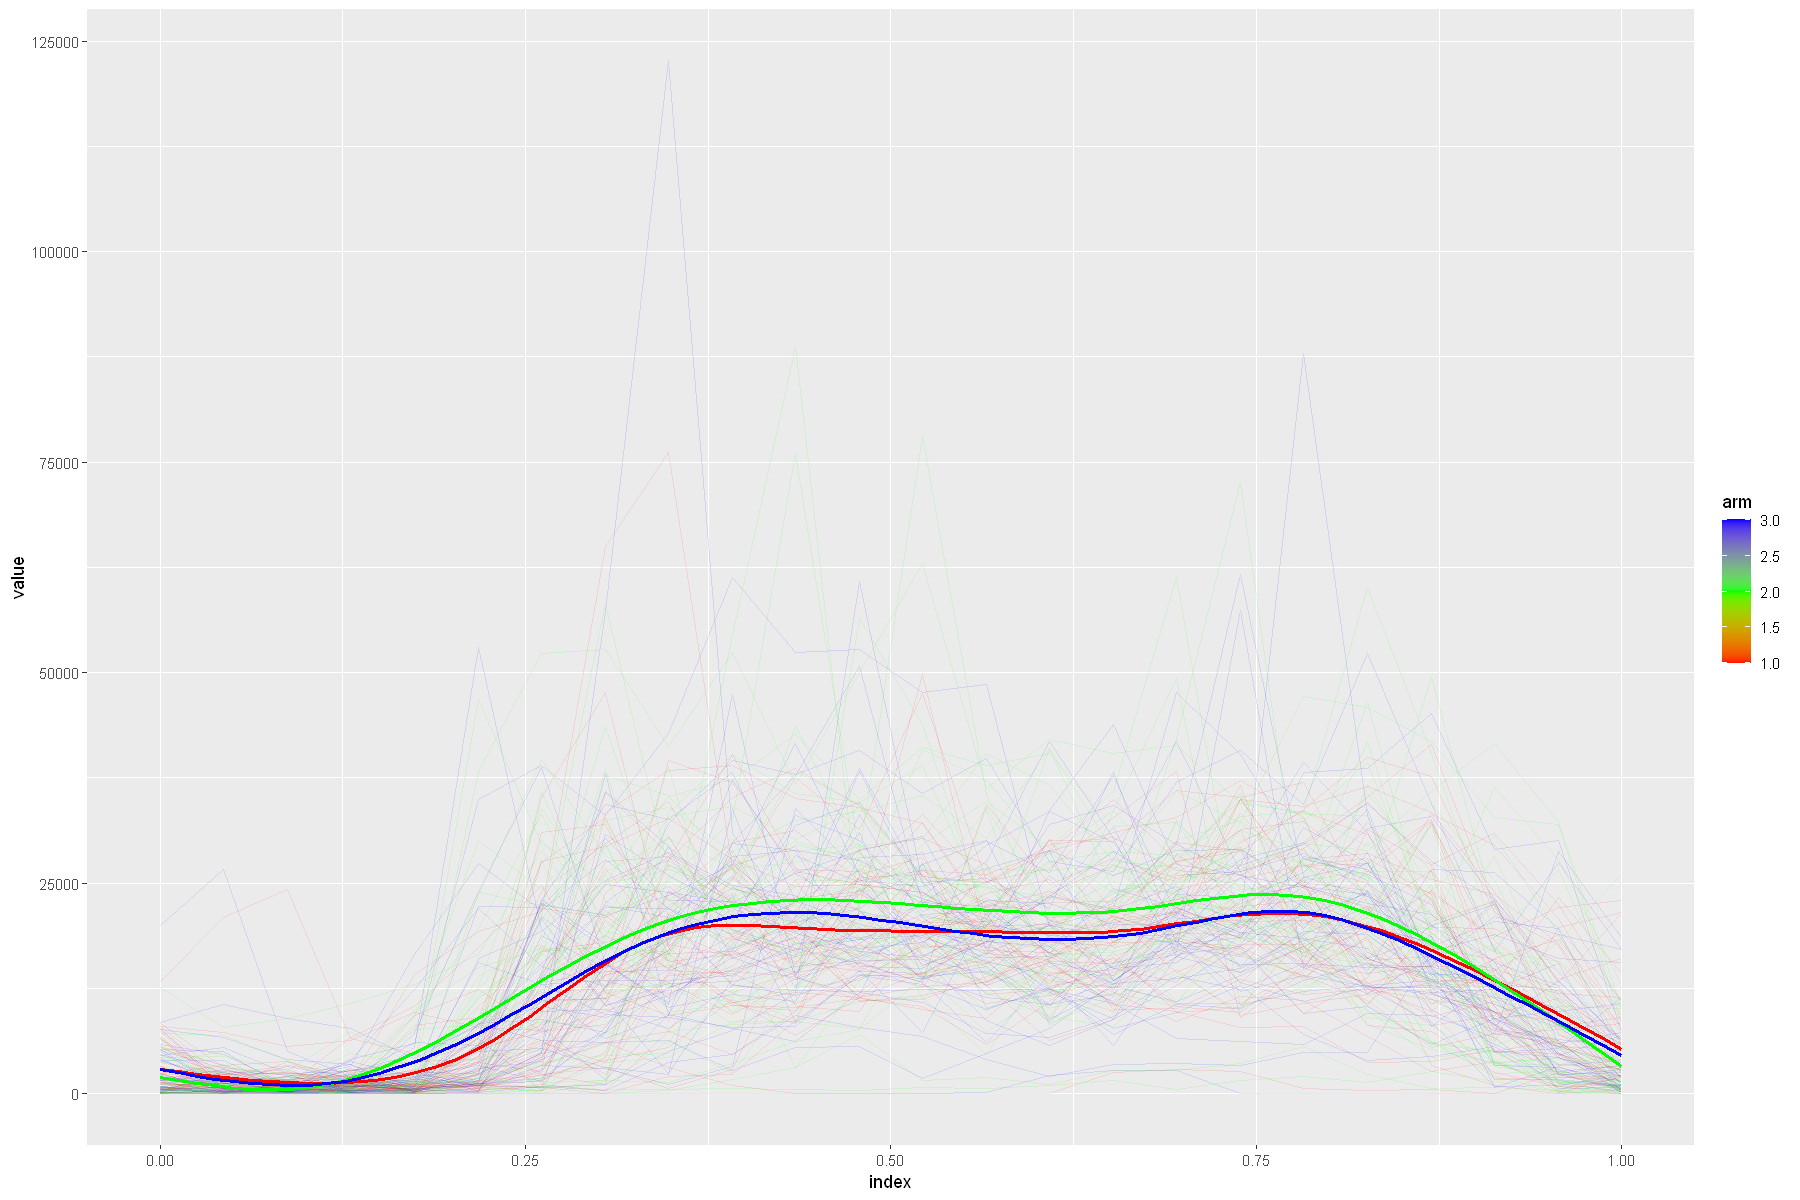

In [88]:
as_refundObj(Y) %>% 
    left_join(dplyr::select(df, id, arm)) %>%
    ggplot(aes(x = index, y = value, group = id, color = arm)) + geom_path(alpha = .1) +
    geom_smooth(aes(group = arm), se = FALSE)+
scale_color_gradientn(colours = rainbow(3))

### Correlation

In [89]:
axtime <- c(0:23) #names(df)[c(3:dim(df)[2])]

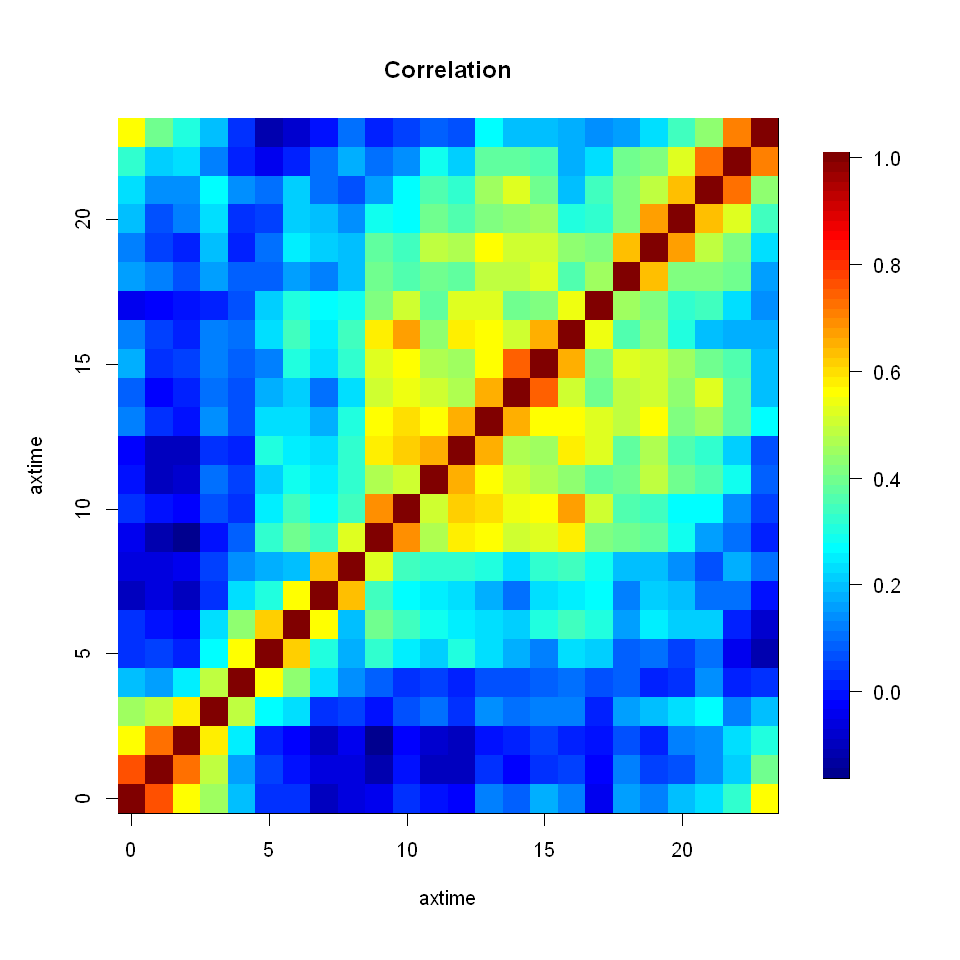

In [90]:
# set plot size
options(repr.plot.width=8, repr.plot.height=8)
# cor(Y)
# image(cor(Y))
image.plot(axtime, axtime, cor(Y), main='Correlation')

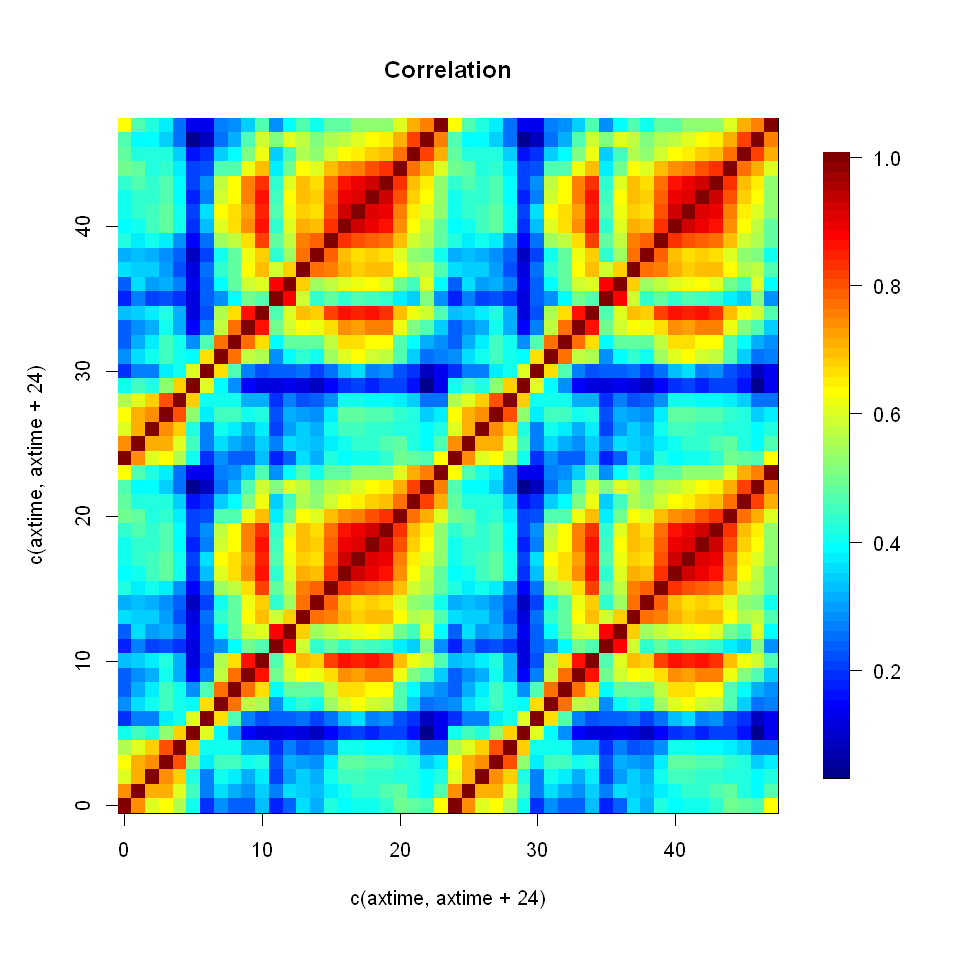

In [19]:
image.plot(c(axtime, axtime+24), c(axtime, axtime+24), cbind(rbind(cor(log(Y+1)), cor(log(Y+1))), rbind(cor(log(Y+1)), cor(log(Y+1)))), main='Correlation')

In [39]:
Ysmth <- smAct(df, axtime)

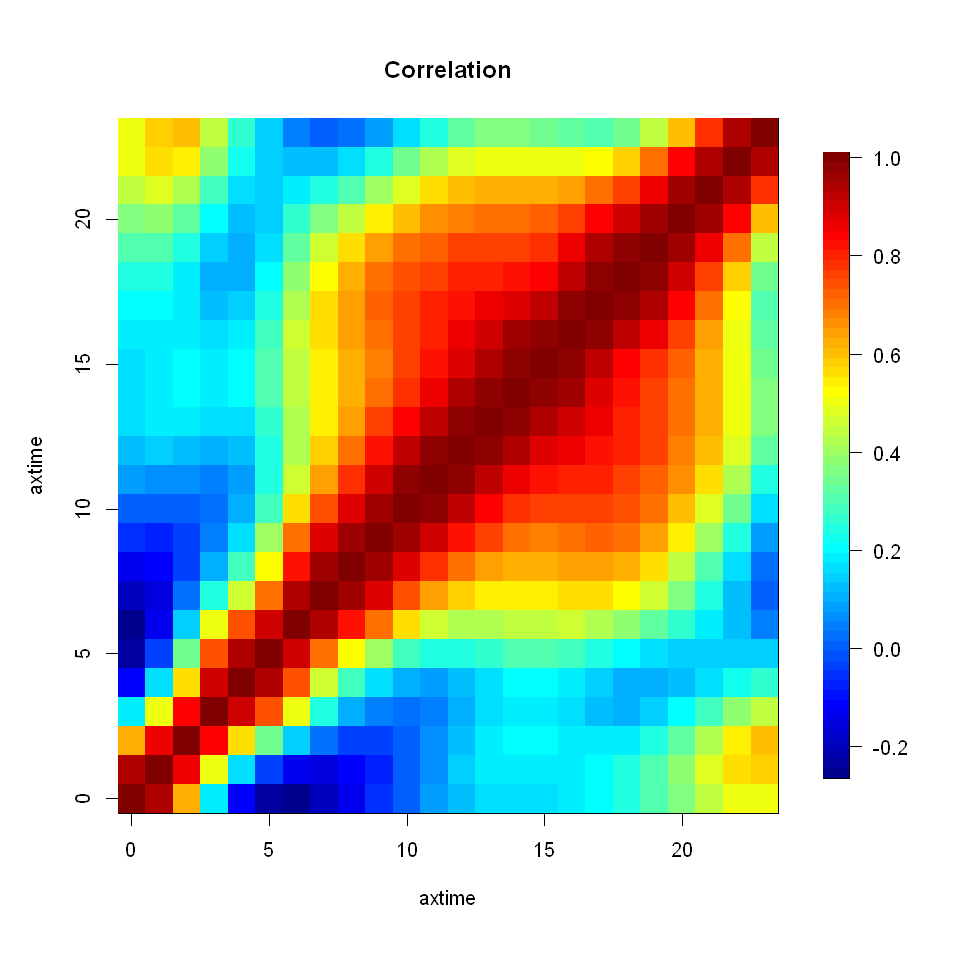

In [40]:
image.plot(axtime, axtime, cor(Ysmth), main='Correlation')

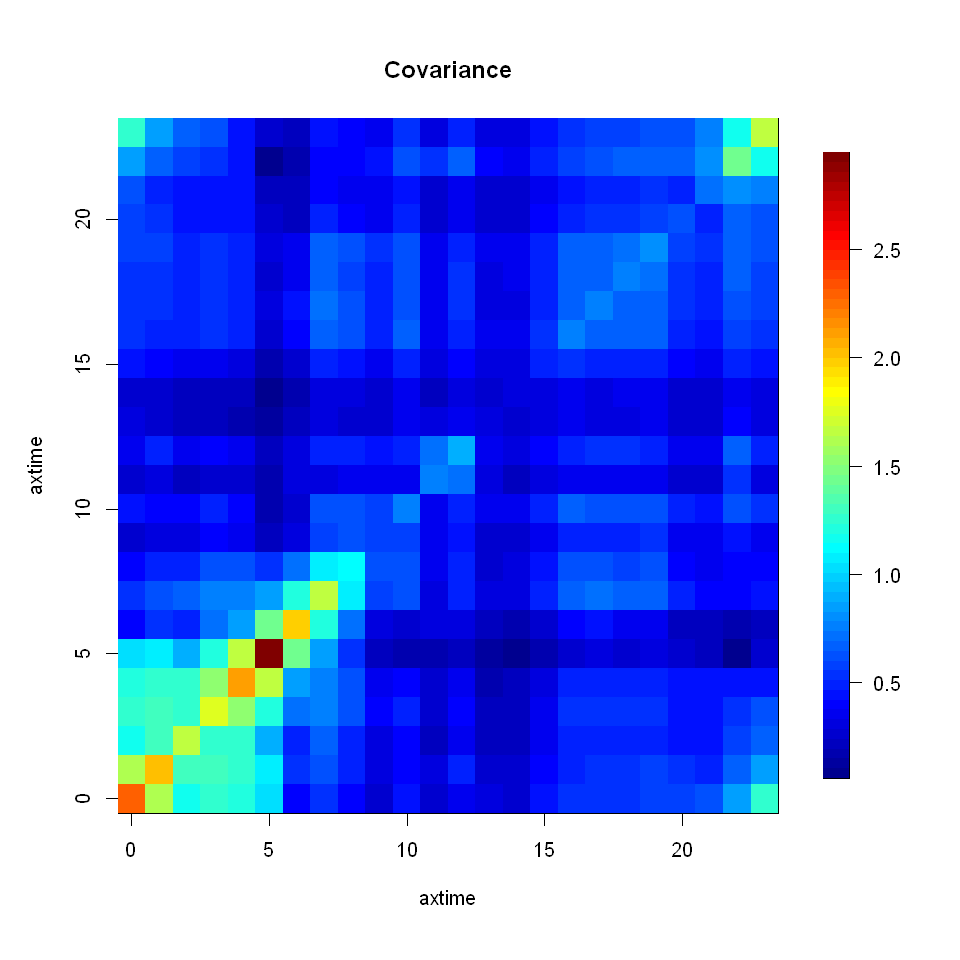

In [41]:
# set plot size
options(repr.plot.width=8, repr.plot.height=8)
# cor(Y)
# image(cor(Y))
image.plot(axtime, axtime, cov(log(Y+1)), main='Covariance')

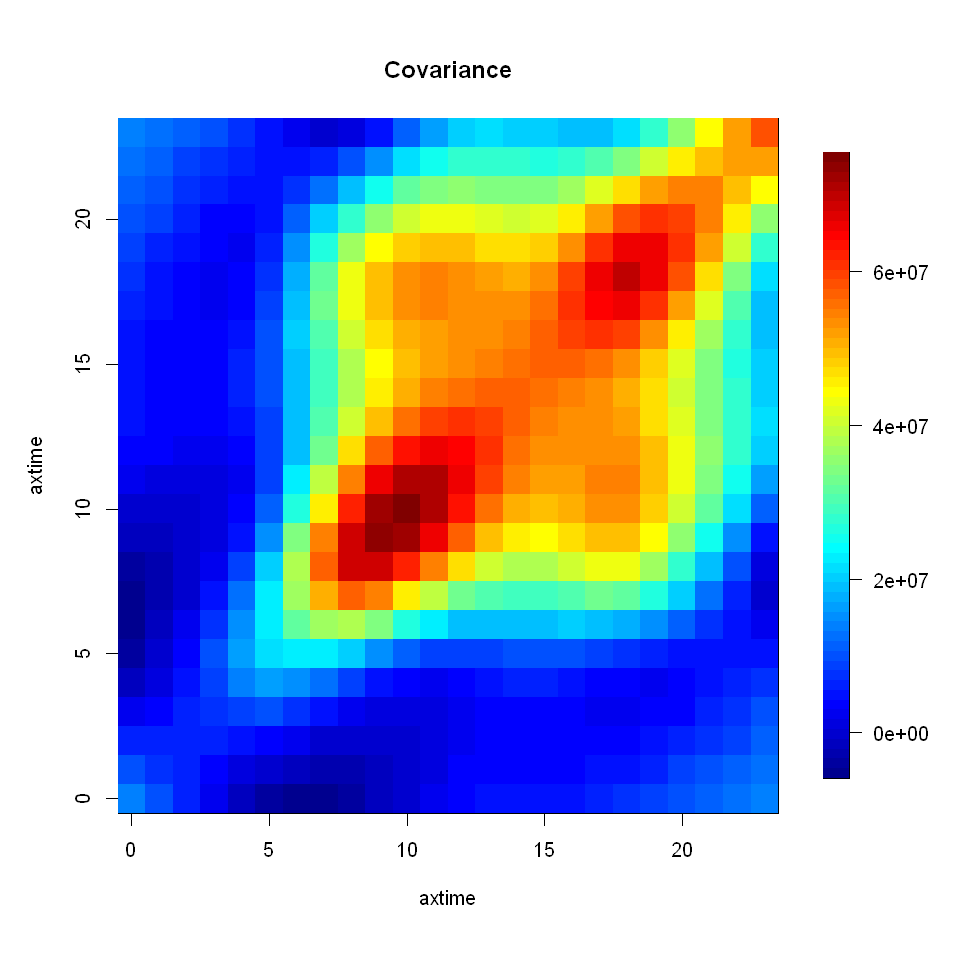

In [42]:
image.plot(axtime, axtime, cov(Ysmth), main='Covariance')

## FANOVA

In [44]:
# Order data frame with respect to the group label
df <- df[order(df$arm),]
head(df, 3)

id,arm,T00h00,T01h00,T02h00,T03h00,T04h00,T05h00,T06h00,T07h00,...,T14h00,T15h00,T16h00,T17h00,T18h00,T19h00,T20h00,T21h00,T22h00,T23h00
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,1,28774.833,3164.8333,4179.667,4172.500,3599.333,8289.000,38356.33,18199.00,...,19682.67,32323.00,24117.33,28279.33,33791.00,35362.17,49850.667,27779.000,16279.667,29627.833
48,1,1764.286,2100.2857,1017.286,1237.429,1617.286,10164.714,18912.86,31462.71,...,18201.86,26424.71,32656.43,26853.00,29088.86,21689.00,5626.714,4234.714,1942.714,2524.571
54,1,205.000,898.5714,1081.857,1709.714,1531.714,1379.714,16349.00,15066.86,...,12080.29,10315.57,19106.43,20360.00,15756.29,14222.43,27119.571,13898.571,10276.429,5642.571


In [50]:
axtime

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

In [51]:
# Select a time window
df <- df[,c(c(1,2),c(0:6)+3)]

In [52]:
axtime <- c(0:6)

In [53]:
# Define range for plot
intrng <- c(0,(dim(df)[2]-3))

In [54]:
intrng

[1] 0 6

In [55]:
# Extract activity matrix from data frame, add name and transpose
mat <- (as.matrix(df[,c(3:dim(df)[2])]))
rownames(mat) <- df$id
mat <- t(mat)

In [56]:
# set plot size
options(repr.plot.width=15, repr.plot.height=10)

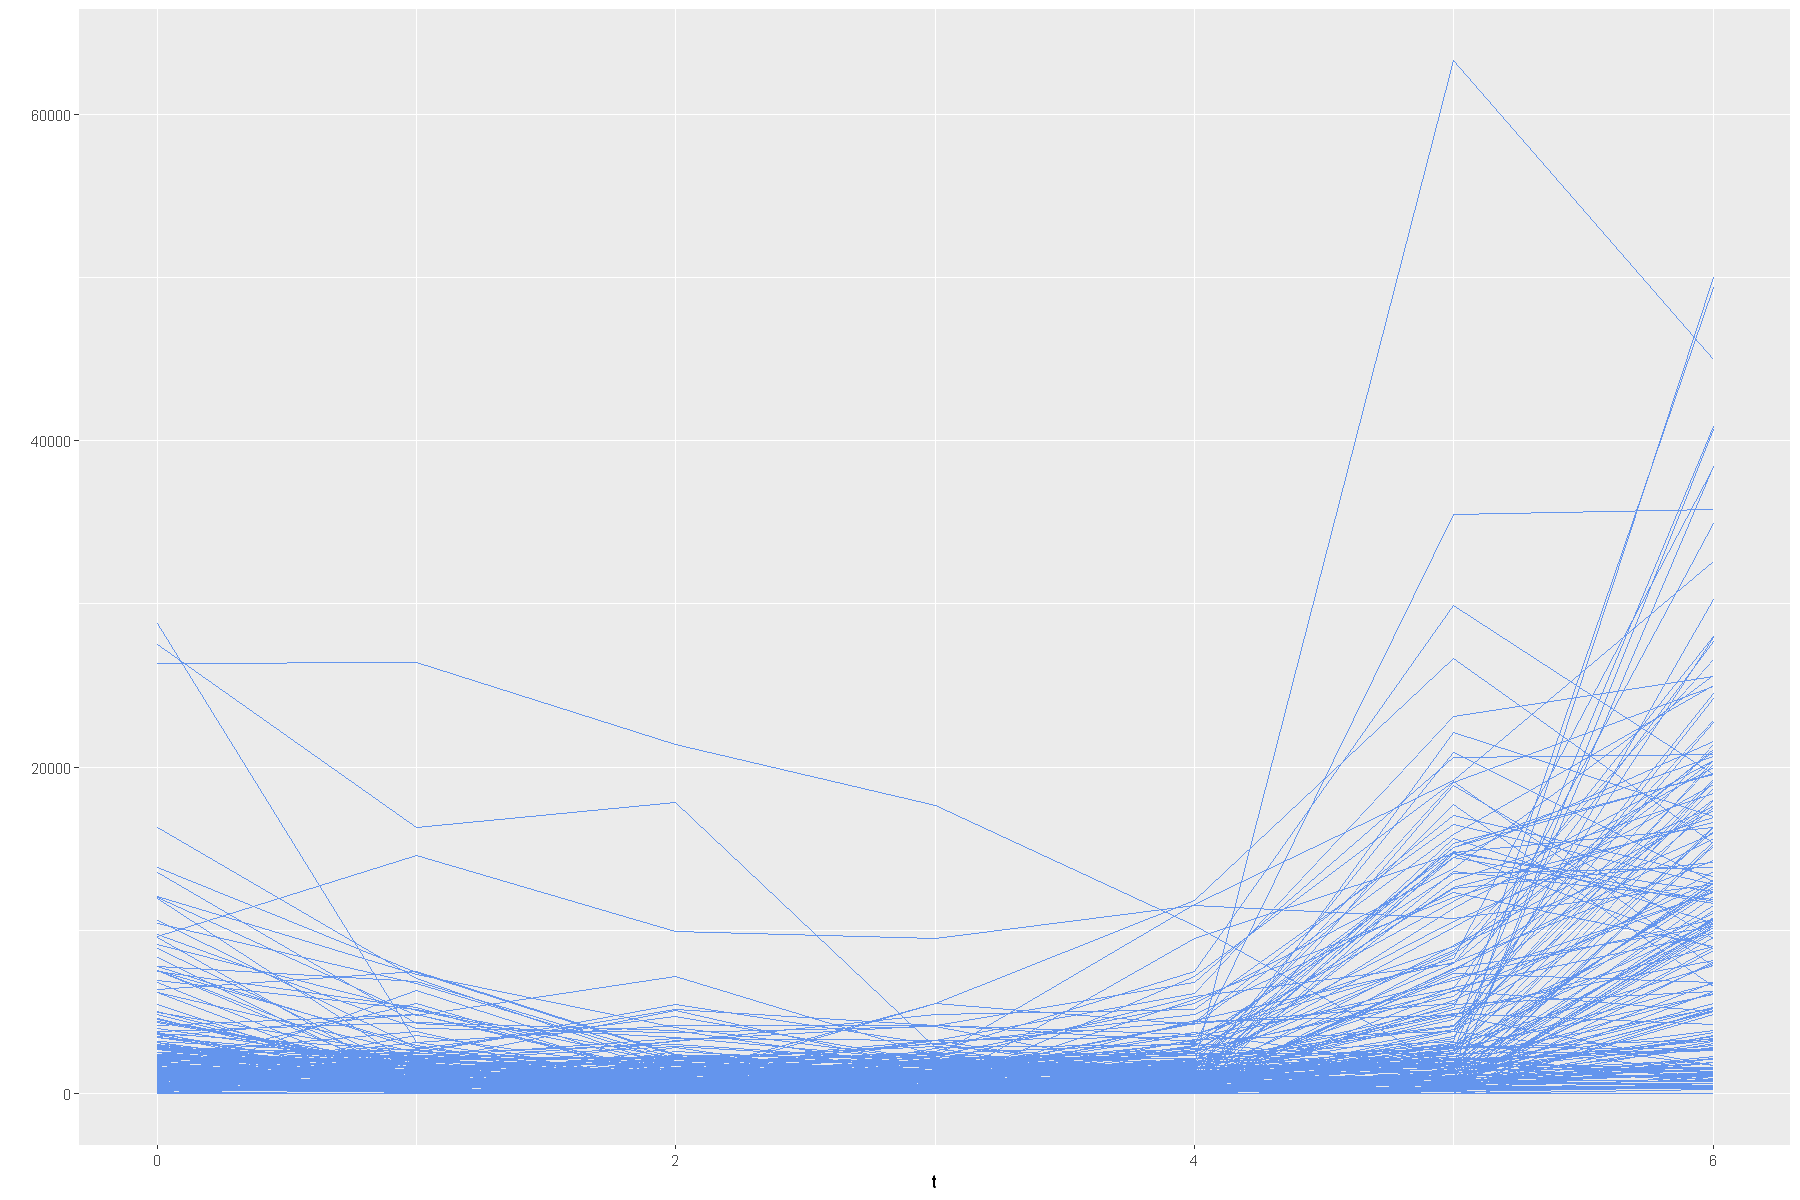

In [57]:
plotFANOVA(x = mat, int = intrng)

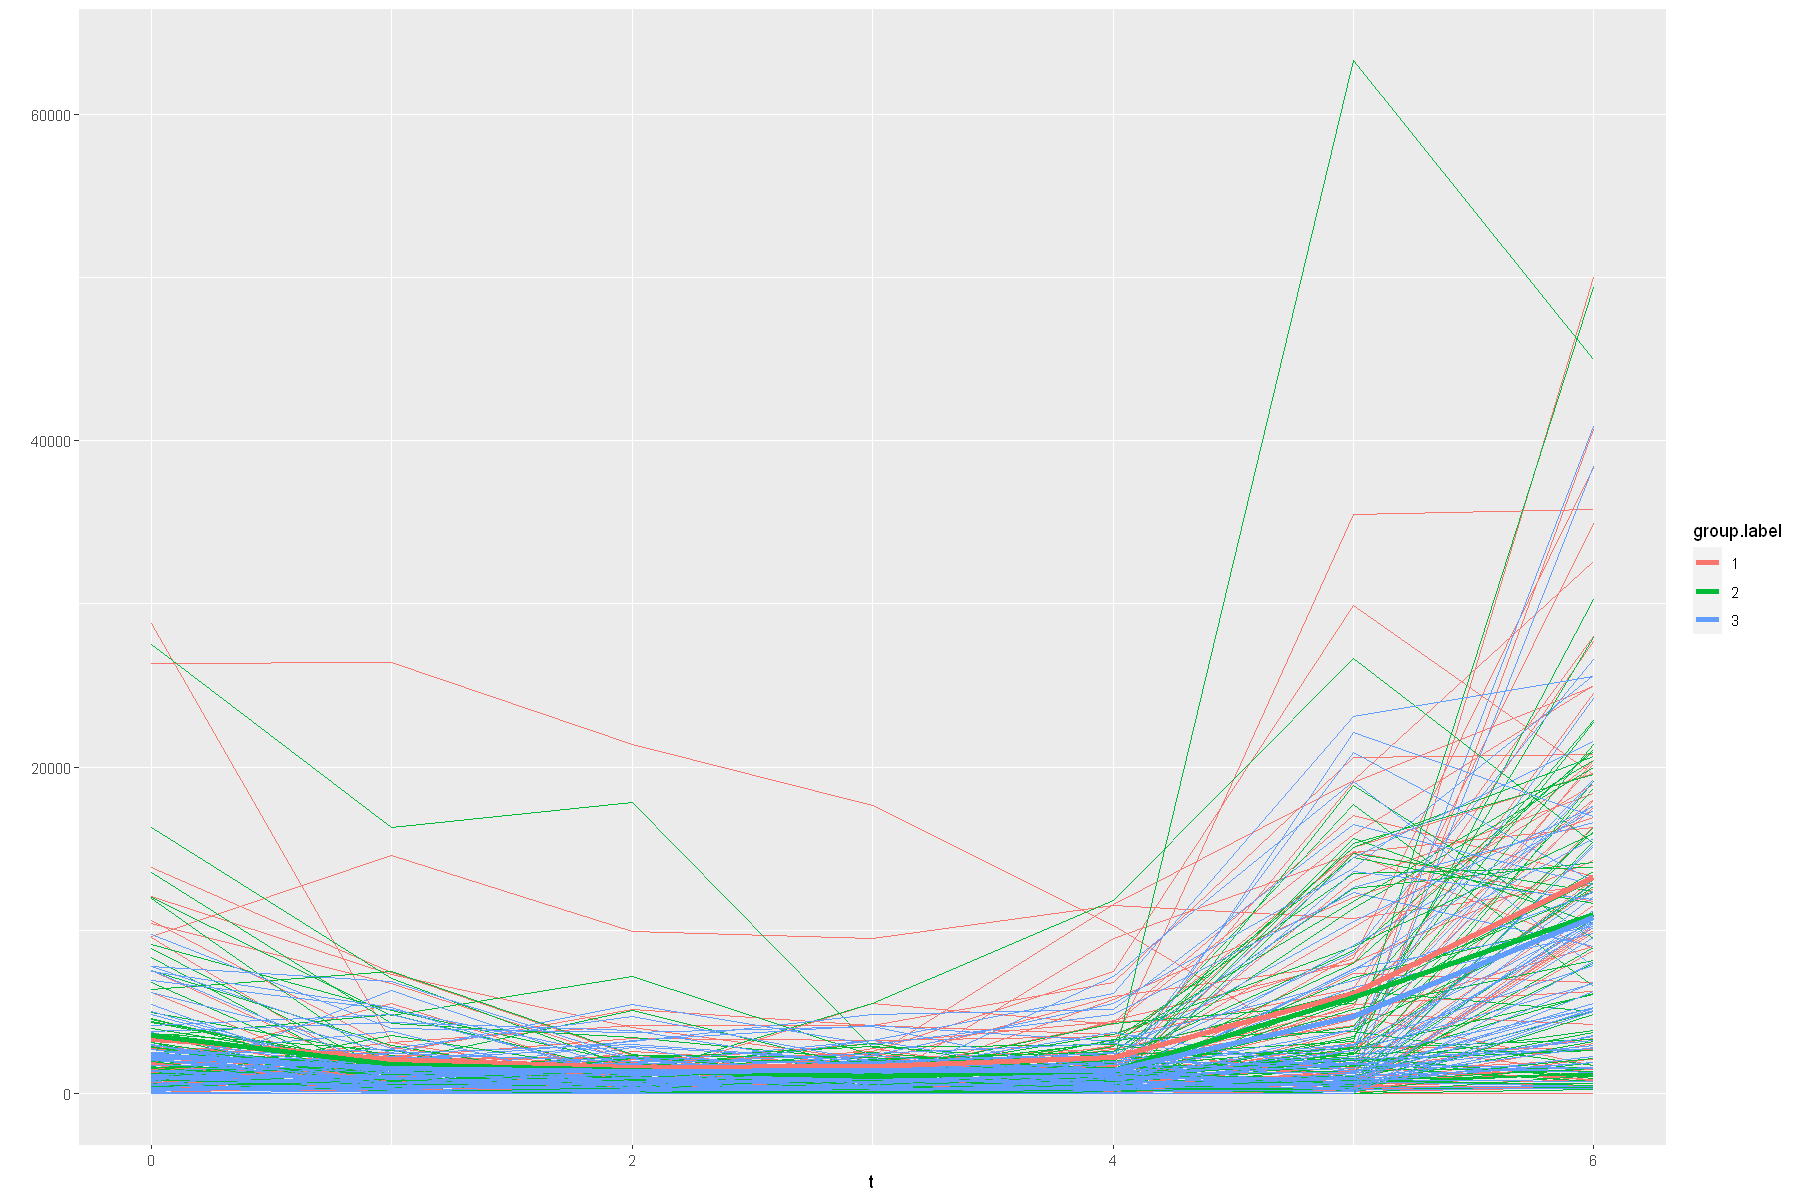

In [59]:
plotFANOVA(x = mat, group.label = as.character(df$arm), int= intrng)

In [60]:
# set plot size
options(repr.plot.width=8, repr.plot.height=8)

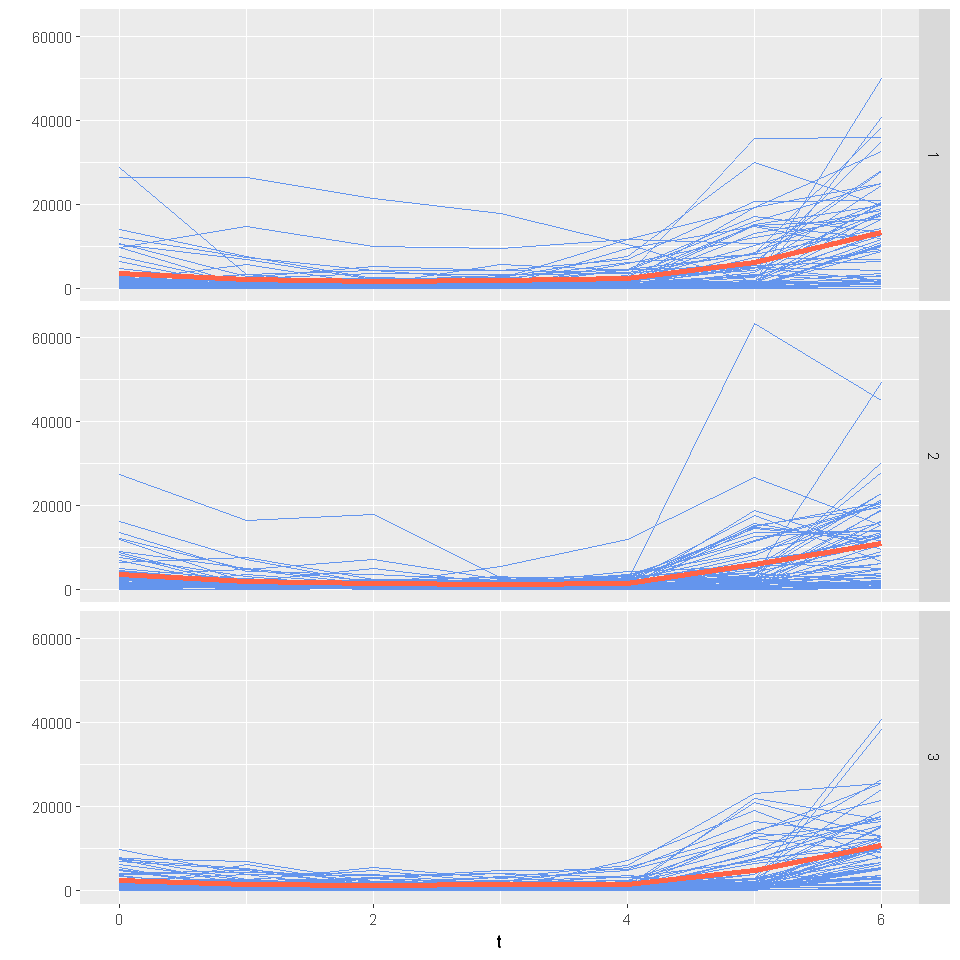

In [62]:
plotFANOVA(x = mat, group.label = as.character(df$arm), int= intrng, separately = TRUE)

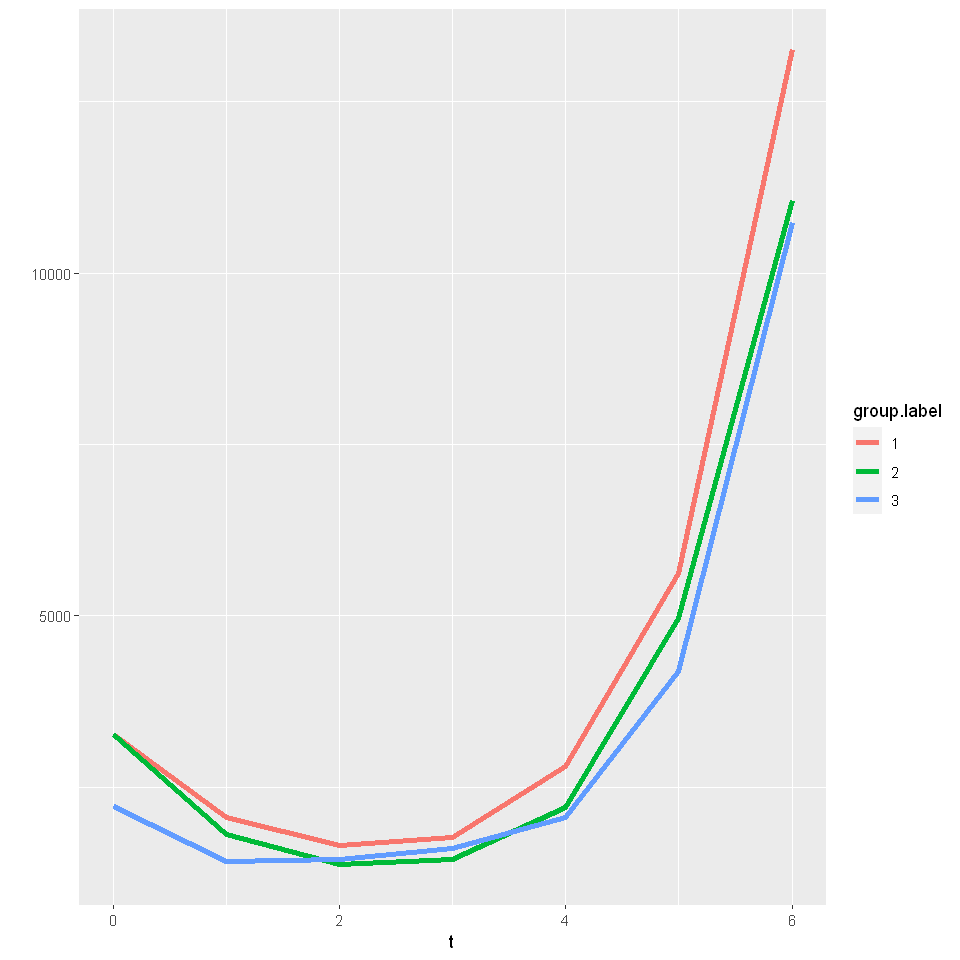

In [63]:
plotFANOVA(x = mat, group.label = as.character(df$arm), int= intrng, means = TRUE, smooth = T)

### Estimation of mean functions
Smooth each curve and take pointwise average.

In [65]:
# Select data for visit = 1 and case = 1
dfAct1 <- subset(df, arm == 1)
Y1 <- as.matrix(dfAct1[,c(3:dim(df)[2])])
n1 <- length(unique(dfAct1$id))

# dfAct2 <- subset(df, arm == 2)
# n2 <- length(unique(dfAct2$id))

# dfAct3 <- subset(df, arm == 3)
# n3 <- length(unique(dfAct3$id))


[1] 21 49 62

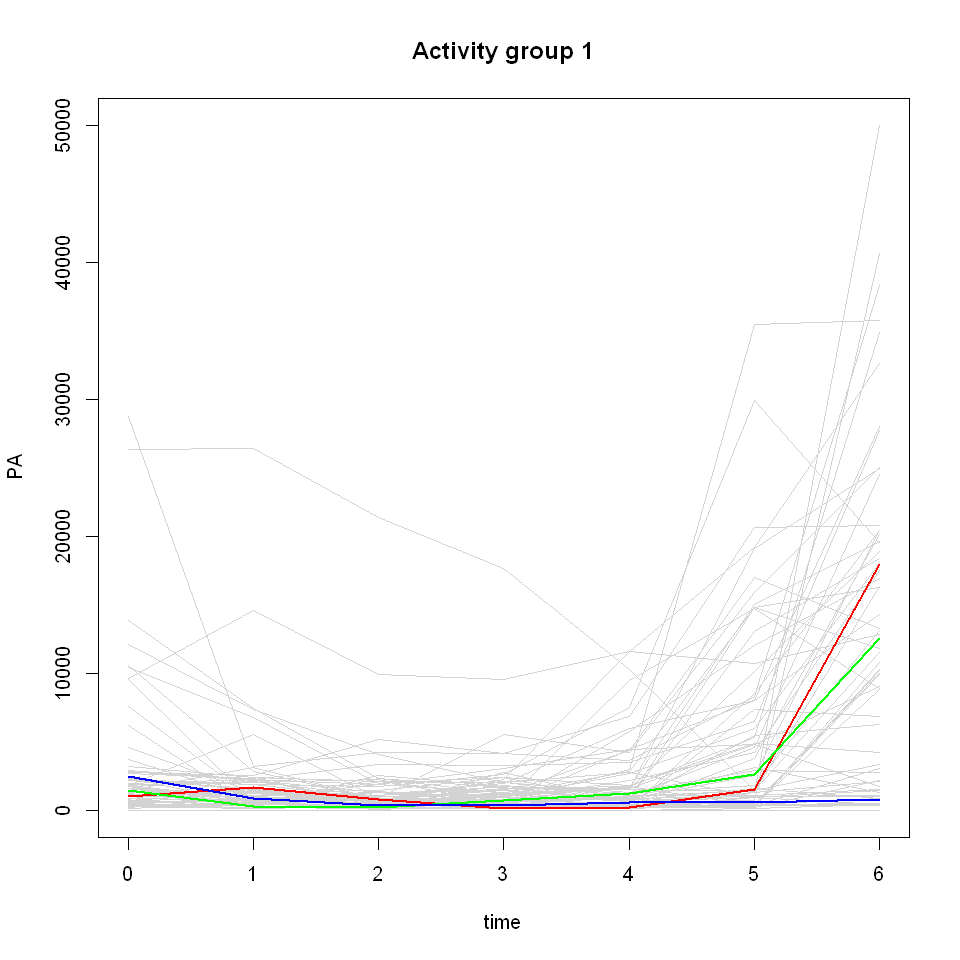

In [66]:
matplot(axtime, t(Y1), 
        type='l', lty=1, col="light grey",
        main = "Activity group 1",
        xlab="time", ylab="PA")

selIndiv <- sample(1:n1, size = 3, replace = FALSE)
selIndiv

matlines(axtime, t(Y1[selIndiv,]), 
         type='l', lty=1, lwd=2, col = rainbow(3))

In [67]:
table(df[,2])


 1  2  3 
63 66 62 

In [68]:
dim(dfAct1)

[1] 63  9

In [69]:
# head(dfAct1)
n = 9 # 13
minArm1 <- min(dfAct1[,n])
minArm1
which(dfAct1[,n] == minArm1)
dfAct1[37, 1]

[1] 0

[1] 14

id
<chr>
532


In [70]:
which(colnames(mat) == "591")

[1] 41

In [71]:
matCut <- mat[,-37] 

In [72]:
dfCut <- df[-37,] 

In [73]:
# Create a matrix of zeros with the same dimension of Y1 
smoothActCurves1 <- array(0, dim(Y1))
n <- nrow(Y1)
for(j in 1:n1){
  # j = 1
    # smooth estimator using penalized cubic B-spline basis functions
   fit <- gam(Y1[j,] ~ s(axtime, k = 7, bs = 'cr'), # k = 10
             method = "REML") # gam() is used for smoothing
  # plot(tract, DTI.baseline$cca[j,])
  # lines(tract, fit$fitted)
  smoothActCurves1[j,] <- fit$fitted
}

ERROR: Error in gam.reparam(UrS, sp, grderiv): NA/NaN/Inf in foreign function call (arg 3)


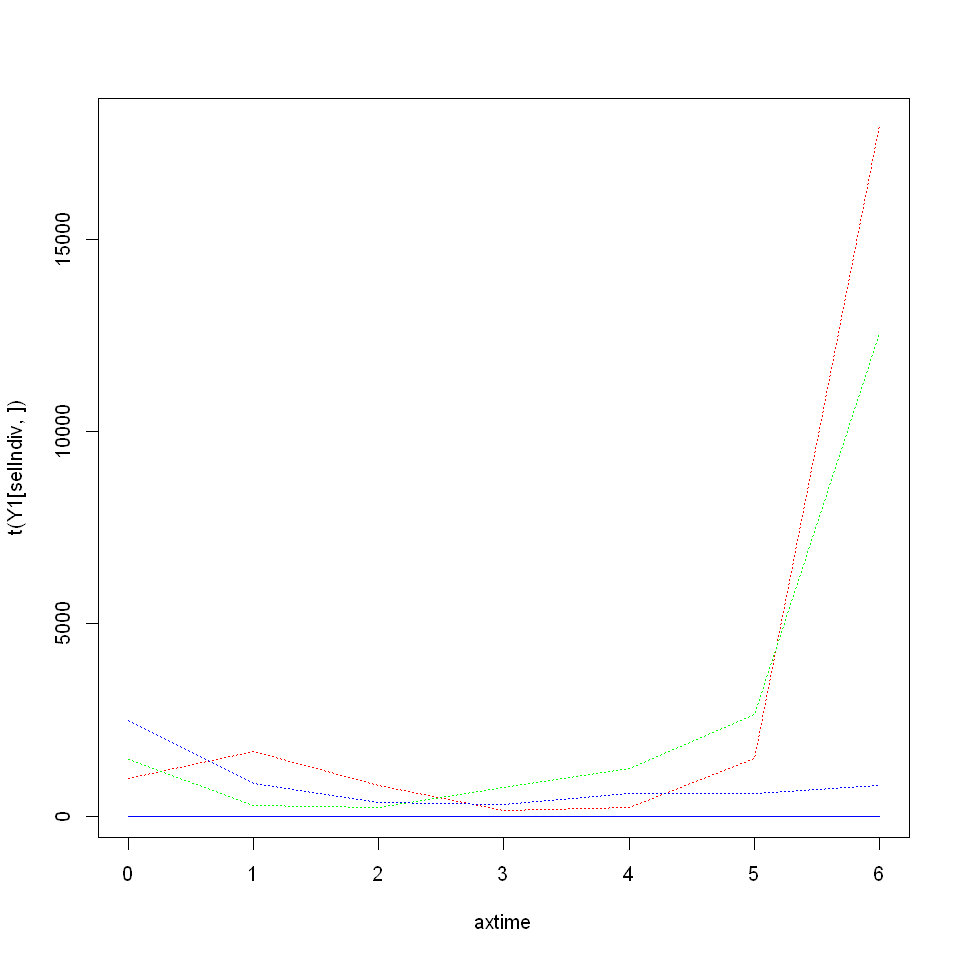

In [74]:
# Plot the smooth fit versus original
matplot(axtime, t(Y1[selIndiv,]), 
         type='l', lty=3, lwd=1, col = rainbow(3))
matlines(axtime, t(smoothActCurves1[selIndiv,]), 
         type='l', lty=1, lwd=1, col = rainbow(3))

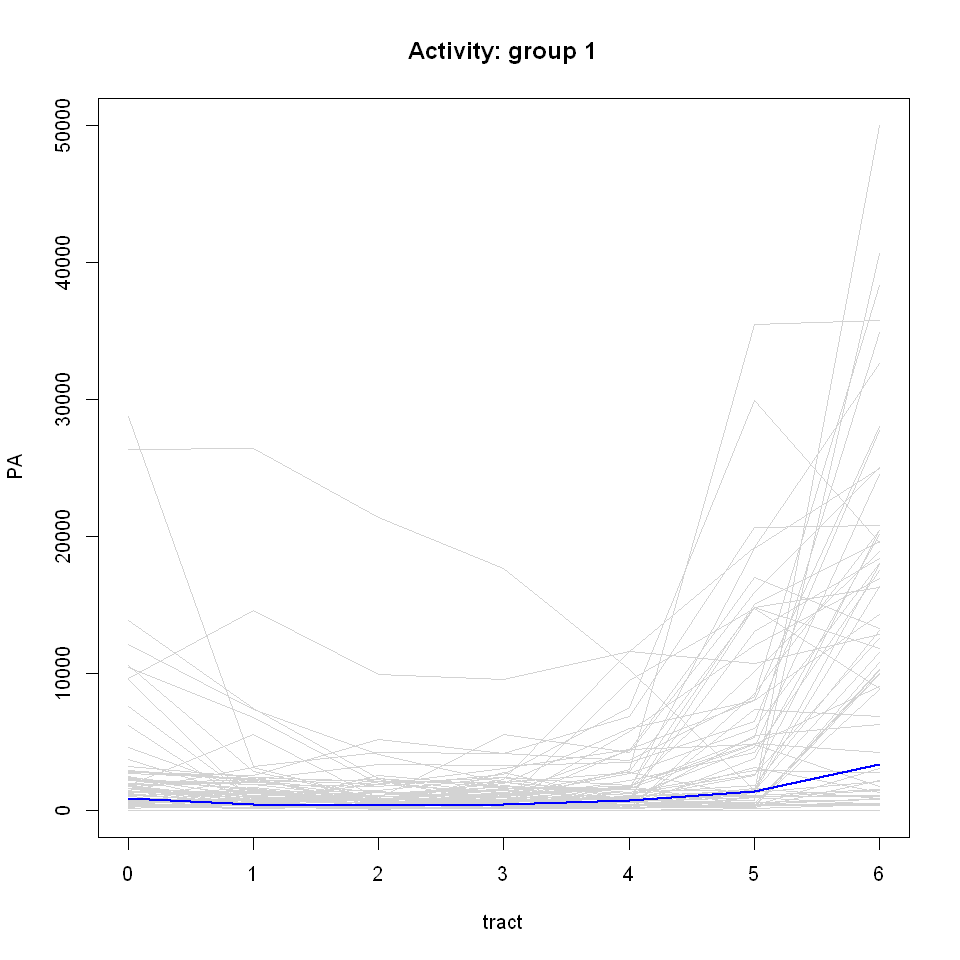

In [75]:
# Average smooth curves
meanHat1 <- colMeans(smoothActCurves1)
# Plot original data with the mean estimation
matplot(axtime, t(Y1), 
        type='l', lty=1, col="light grey",
        main = "Activity: group 1",
        xlab="tract", ylab="PA")
lines(axtime, meanHat1, col='blue', lwd=2)

In [76]:
meanHat2 <-smActGrp(df, 2, axtime)
meanHat3 <-smActGrp(df, 3, axtime)

In [77]:
diffMean <- tibble(
    time =  c(0:(dim(df)[2]-3)),
    diff12 = abs(meanHat2-meanHat1),
    diff13 = abs(meanHat3-meanHat1),
    diff23 = abs(meanHat3-meanHat2)
)

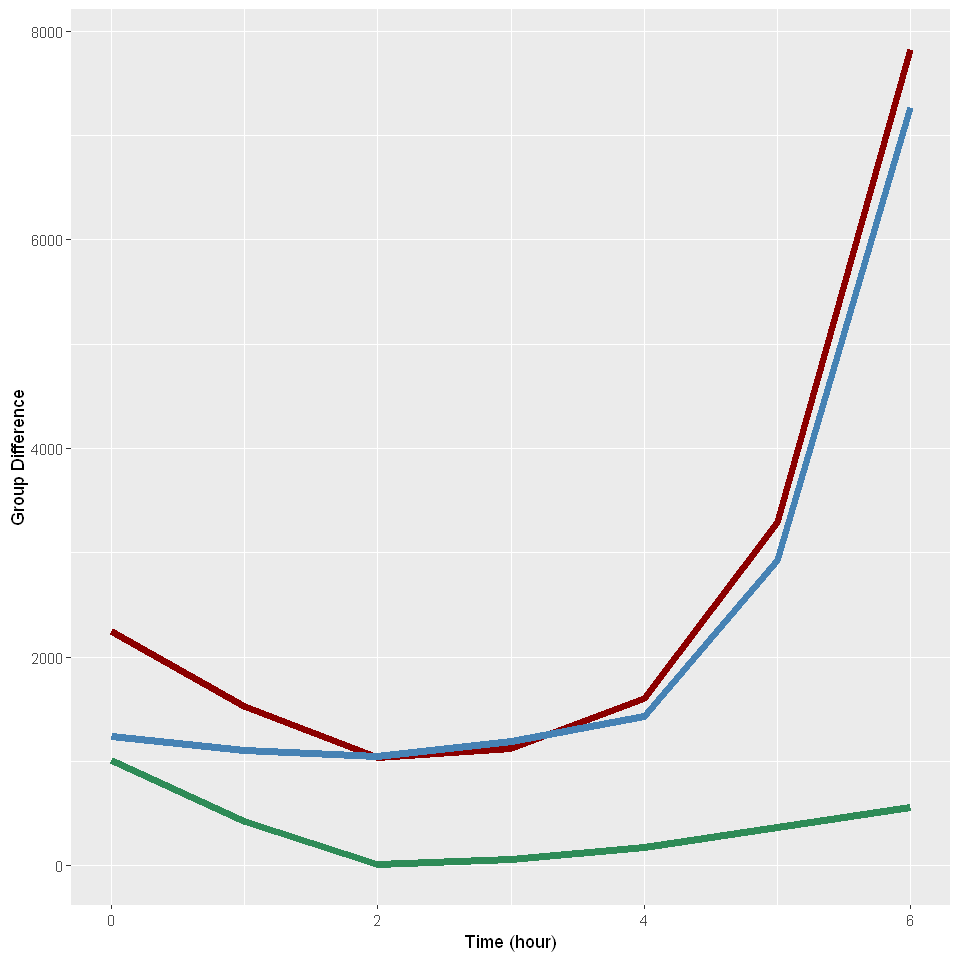

In [78]:
ggplot(diffMean, aes(x=time)) + 
  geom_line(aes(y = diff12), color = "darkred", size=2) + 
  geom_line(aes(y = diff13), color="steelblue", size=2) +
  geom_line(aes(y = diff23), color= "seagreen4", size=2) +
  labs(y="Group Difference", x = "Time (hour)", color = "Legend") +
    scale_color_manual(values = colors)

### FANOVA Test

In [45]:
set.seed(123)

In [46]:

rownames(Ysmth) <- df$id
Ysmth <- t(Ysmth)

In [47]:
fanova <- fanova.tests(x = Ysmth, group.label = df$arm)

In [79]:
# fanova <- fanova.tests(x = matCut, group.label = dfCut$Arm)
fanova <- fanova.tests(x = mat, group.label = df$arm)

Warning message in KK[j] <- 2 * which(v[j, ] == min(v[j, ])) + minK - 2:
"number of items to replace is not a multiple of replacement length"


In [48]:
fanova

     Analysis of Variance for Functional Data 
 
FP test - permutation test based on a basis function representation 
Test statistic = 0.4635498  p-value = 0.797 
 
CH test - L2-norm-based parametric bootstrap test for homoscedastic samples 
Test statistic = 3256773784  p-value = 0.8001 
 
CS test - L2-norm-based parametric bootstrap test for heteroscedastic samples 
Test statistic = 3256773784  p-value = 0.7833 
 
L2N test - L2-norm-based test with naive method of estimation 
Test statistic = 1081325611  p-value = 0.7678121 
 
L2B test - L2-norm-based test with bias-reduced method of estimation 
Test statistic = 1081325611  p-value = 0.7681493 
 
L2b test - L2-norm-based bootstrap test 
Test statistic = 1081325611  p-value = 0.7847 
 
FN test - F-type test with naive method of estimation 
Test statistic = 0.4635455  p-value = 0.7677221 
 
FB test - F-type test with bias-reduced method of estimation 
Test statistic = 0.4635455  p-value = 0.769794 
 
Fb test - F-type bootstrap test 
Tes

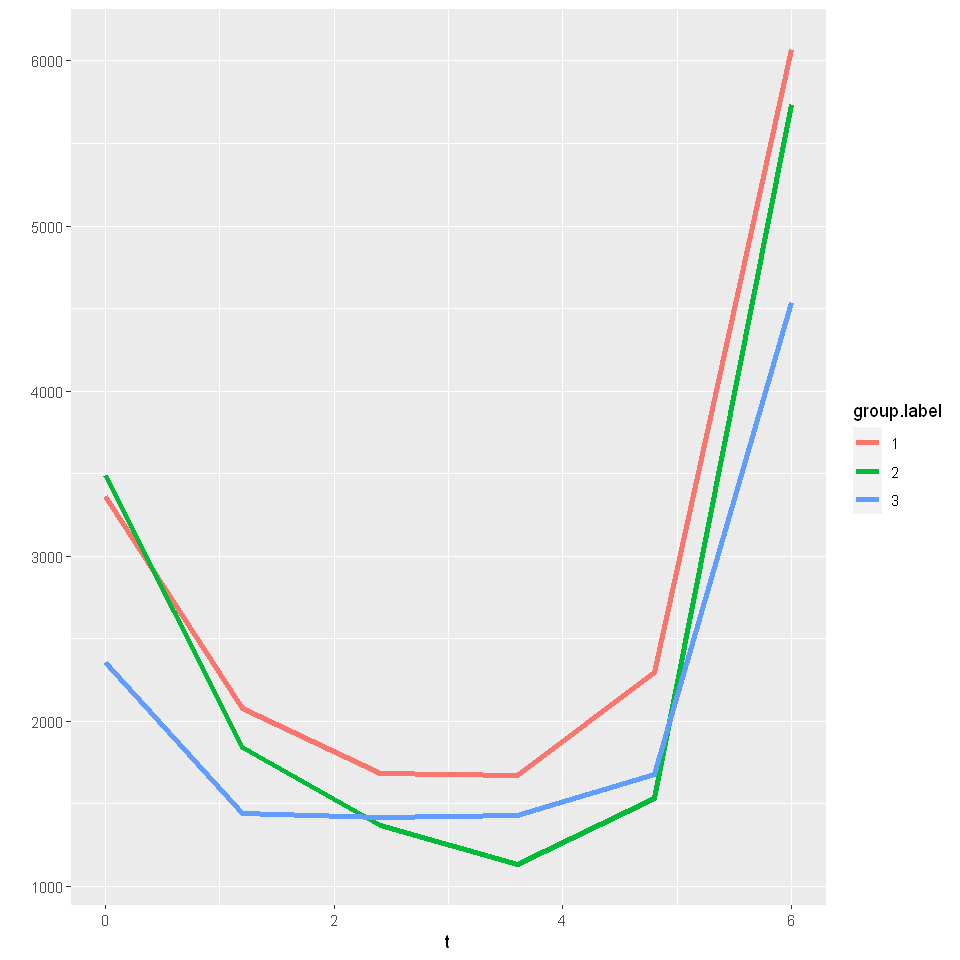

In [193]:
plotFANOVA(x = mat[c(1:6),], group.label = as.character(df$Arm), int= c(0, 6), means = TRUE, smooth = T)

##### fanovares <- fanova.tests(x = mat[c(8:20),], group.label = df$Arm)

In [194]:
# Create temporal axis depending on the resolution of the data
time <- 1:(dim(df)[2]-2)

Y <- as.matrix(df[,c(3:dim(df)[2])]) # response: physical activity
X <- as.vector(df$Arm) # predictor: treatment assignment

myDat <- data.frame(X = X)
myDat$Y <- Y

dim(Y);length(X)

[1] 191   7

[1] 191

In [19]:
temp_df = df
temp_df$Arm = as.factor(temp_df$Arm)

In [20]:
temp_df$accel = Y

In [21]:
temp_df$mean_accel = apply(Y, 1, mean)

In [22]:
mod1 = lm(mean_accel~Arm, data = temp_df)
summary(mod1)


Call:
lm(formula = mean_accel ~ Arm, data = temp_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13620.2  -3788.9   -746.9   2856.8  16920.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13707.23     543.51  25.220   <2e-16 ***
Arm2        -1609.04     779.73  -2.064    0.040 *  
Arm3           13.87     760.50   0.018    0.985    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5185 on 269 degrees of freedom
Multiple R-squared:  0.0208,	Adjusted R-squared:  0.01352 
F-statistic: 2.857 on 2 and 269 DF,  p-value: 0.05918


Warning message in model.matrix.default(mt_fixed, mf_fixed, contrasts):
"non-list contrasts argument ignored"


Using OLS to estimate residual covariance 
GLS 


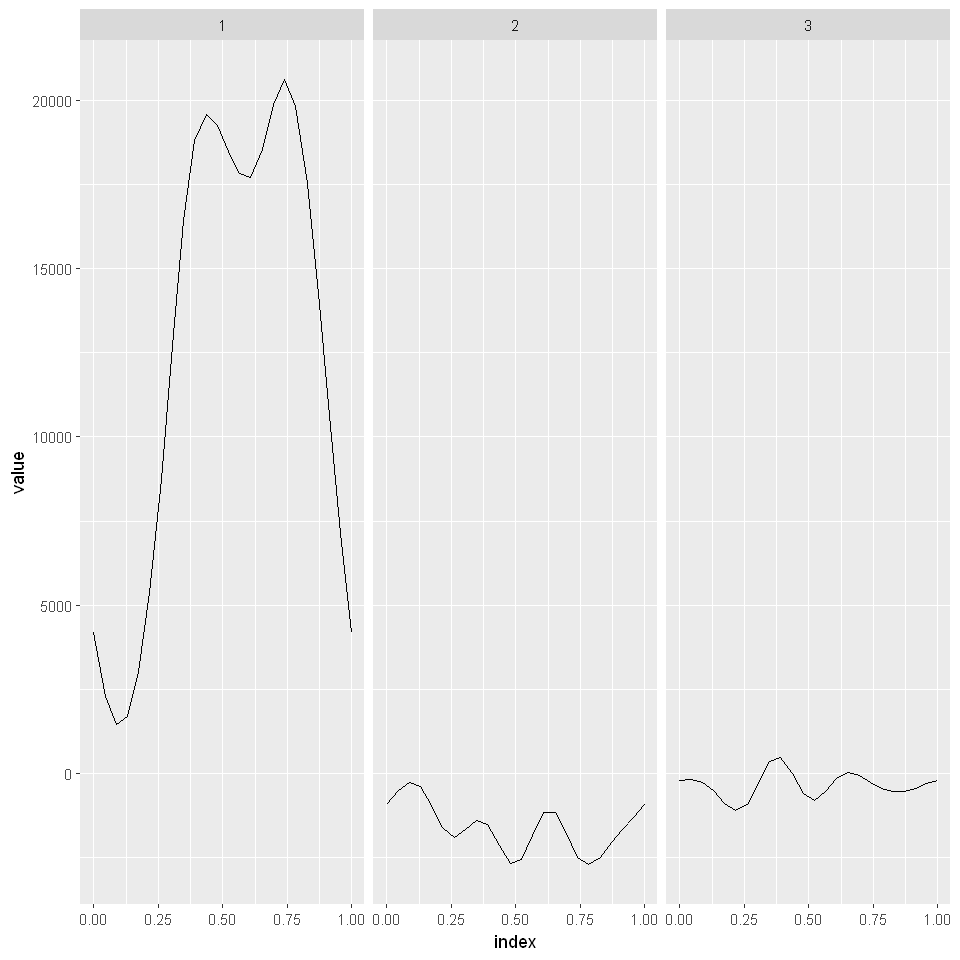

In [23]:
# kt number of basis functions
fosr_slr = bayes_fosr(accel ~ Arm, data = temp_df, 
                                            est.method = "GLS", Kt = 8, basis = "pbs")


## Warning in model.matrix.default(mt_fixed, mf_fixed, contrasts): non-list
## contrasts argument ignored
## Using OLS to estimate residual covariance 
## GLS

as_refundObj(fosr_slr$beta.hat) %>% 
    ggplot(aes(x = index, y = value)) + facet_grid(~id) + geom_path()

In [ ]:
> wheat = read.table('http://www.stat.berkeley.edu/classes/s133/data/wheat.txt',header=TRUE)
> plot(wheat$year,wheat$production)
> lines(smooth.spline(wheat$year,wheat$production))

## Functions

### Smooth mean function

In [36]:

smActGrp <- function(dfAct, grp, timeAx){
    # Select data for visit = 1 and case = 1
    dfGrp <- subset(dfAct, arm == grp)
    Y <- as.matrix(dfGrp[,c(3:dim(dfAct)[2])])
    n <- length(unique(dfGrp$id))

    # Create a matrix of zeros with the same dimension of Y1 
    smoothActCurves <- array(0, dim(Y))
    
    for(j in 1:n){
      # j = 1
        # smooth estimator using penalized cubic B-spline basis functions
       fit <- gam(Y[j,] ~ s(timeAx, k = 7, bs = 'cr'), # k =10
                 method = "REML") # gam() is used for smoothing
      # plot(tract, DTI.baseline$cca[j,])
      # lines(tract, fit$fitted)
      smoothActCurves[j,] <- fit$fitted
    }

    # Average smooth curves
    meanHat <- colMeans(smoothActCurves)
    
    return(meanHat)
}

In [37]:
test <-smActGrp(df, 1, axtime)

# Plot original data with the mean estimation
matplot(axtime, t(Y1), 
        type='l', lty=1, col="light grey",
        main = "Activity: group 1",
        xlab="tract", ylab="PA")
lines(axtime, test, col='blue', lwd=2)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': object 'Y1' not found


### Smooth Activity

In [38]:
smAct <- function(dfAct,timeAx){
    # Select data for visit = 1 and case = 1
    Y <- as.matrix(dfAct[,c(3:dim(dfAct)[2])])
    n <- length(unique(dfAct$id))

    # Create a matrix of zeros with the same dimension of Y1 
    smoothActCurves <- array(0, dim(Y))
    
    for(j in 1:n){
      # j = 1
        # smooth estimator using penalized cubic B-spline basis functions
       fit <- gam(Y[j,] ~ s(timeAx, k = 10, bs = 'cr'),
                 method = "REML") # gam() is used for smoothing
      # plot(tract, DTI.baseline$cca[j,])
      # lines(tract, fit$fitted)
      smoothActCurves[j,] <- fit$fitted
    }
   
    return(smoothActCurves)
}

In [158]:
# mat <- (as.matrix(df[,c(3:dim(df)[2])]))

In [169]:
dftmp <- data.frame( id= df[,1],
          Arm = df[,2],
          act = rowSums(df[,c(3:dim(df)[2])])
    )

In [170]:
names(dftmp)

[1] "id"  "Arm" "act"

In [175]:

rslt <- aov(act ~ as.factor(Arm), data = dftmp)

summary(rslt)

                Df    Sum Sq   Mean Sq F value Pr(>F)  
as.factor(Arm)   2 6.650e+10 3.325e+10   2.543 0.0823 .
Residuals      139 1.818e+12 1.308e+10                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [159]:
mattmp <- (as.matrix(df[,c(3:dim(df)[2])]))
mattmp

T00h00,T01h00,T02h00,T03h00,T04h00,T05h00,T06h00,T07h00,T08h00,T09h00,...,T14h00,T15h00,T16h00,T17h00,T18h00,T19h00,T20h00,T21h00,T22h00,T23h00
8015.14286,7270.14286,5570.00000,6344.71429,9615.28571,7870.00000,24050.2857,29771.143,34668.429,20768.143,...,17926.71,17574.000,23023.286,21702.143,29169.7143,34612.4286,27223.5714,30893.1429,22504.42857,11011.8571
1572.42857,1458.28571,928.57143,2789.42857,3816.57143,4123.71429,31022.5714,32033.429,16555.000,28893.143,...,20890.86,21442.286,27672.286,34913.143,34061.5714,36497.1429,33415.5714,23968.8571,13184.71429,21453.2857
1277.00000,673.00000,3869.00000,1736.00000,2722.14286,3769.85714,2637.0000,12678.857,23509.000,29847.571,...,28944.14,34899.571,27546.571,28756.143,33814.0000,39983.5714,37626.5714,21499.8571,17662.57143,5961.5714
515.33333,863.16667,814.33333,1006.33333,1123.50000,6642.83333,35192.3333,47602.333,17363.500,10839.333,...,11737.50,21383.167,23068.000,25609.667,27075.3333,27938.3333,23627.1667,5024.0000,6330.16667,437.3333
13.71429,13.71429,44.57143,23.14286,10.71429,92.14286,3339.7143,6127.143,3131.429,1010.000,...,0.00,2541.714,2859.571,2605.571,655.8571,402.4286,495.7143,69.0000,2480.00000,279.5714
6590.80000,552.60000,657.20000,867.60000,123.60000,2299.60000,27608.0000,29409.400,32741.600,27842.200,...,20154.00,22547.400,29927.600,21868.200,15650.0000,31361.0000,27053.6000,8306.2000,3525.40000,2967.8000
1937.66667,789.16667,2682.66667,1333.33333,2891.66667,1537.83333,2126.5000,3905.667,5549.000,11161.333,...,15571.50,10394.167,14725.000,9344.000,10714.1667,11832.0000,13201.1667,8149.5000,2424.00000,3327.5000
1510.57143,161.28571,939.57143,118.14286,1666.71429,6627.71429,12003.2857,12472.571,17019.571,27547.286,...,15652.43,15500.857,22071.571,19196.571,13812.8571,18634.8571,3404.8571,973.8571,20.14286,561.8571
7419.00000,859.50000,871.50000,567.00000,579.50000,1001.00000,2526.0000,14296.000,18216.000,25392.000,...,26768.50,32833.000,38321.500,9076.000,14456.0000,21735.0000,26500.0000,6181.0000,19773.50000,21553.5000
2445.83333,277.33333,16.50000,185.50000,45.00000,1203.33333,740.6667,0.000,2029.833,2324.167,...,30144.83,17912.167,18046.000,23735.833,16468.1667,12959.8333,8152.1667,9298.3333,5598.50000,5312.0000


In [1]:
vec1 <- c(1,1,2,3)

In [2]:
vec1

[1] 1 1 2 3

In [3]:
unique(vec1)

[1] 1 2 3

In [4]:
length(vec1)
length(unique(vec1))

[1] 4

[1] 3